In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Removing unecessary columns that have no relation with the price's prediction

In [4]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.shape

(13320, 5)

Now starting with Data Cleaning

In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

As compared to the total rows, we can easily drop all these null values

In [9]:
df2.dropna(inplace=True)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

We need to fix these irregularities in size column to single valued integer

In [12]:
df3 = df2.copy()
df3['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))

In [14]:
df3.drop('size', axis='columns', inplace=True)
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


Now check for irregularies in the total_sqft column

In [15]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

We need to fix this  '1133 - 1384' type values to float values

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


So there are 190 rows with values like that , so we need to fix this by taking their average

In [20]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try: 
        return float(x)
    except:
        return None

In [22]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.loc[122]

location      Hebbal
total_sqft    5611.5
bath             4.0
price          477.0
bhk                4
Name: 122, dtype: object

Now these type of values are fixed 

In [23]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [24]:
df5 = df4.copy()

Now let's work on the location column

In [25]:
df5['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1304,), dtype=object)

There are 1304 unique locations so we cannot directly apply encoding to this categorical value as this will increase the number of columns significantly.

In [27]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                              535
Sarjapur  Road                          392
Electronic City                         304
Kanakpura Road                          266
Thanisandra                             236
                                       ... 
Duddanahalli                              1
Doddanakunte                              1
Jogupalya                                 1
Subhash Nagar                             1
Kengeri Satellite Town KHB Apartment      1
Name: count, Length: 1293, dtype: int64

So here we can group all the location occuring less than 10 times to be as 'other'

In [28]:
location_others = location_stats[location_stats <= 10]
df5.location = df5.location.apply(lambda x: 'other' if x in location_others else x)
len(df5.location.unique())

242

In [29]:
df5.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [31]:
df5[df5['location'] == 'other']

,location,total_sqft,bath,price,bhk
9,other,1020.0,6.0,370.00,6
18,other,2770.0,4.0,290.00,3
19,other,1100.0,2.0,48.00,2
25,other,1250.0,3.0,56.00,3
42,other,600.0,1.0,38.00,1
...,...,...,...,...,...
13291,other,812.0,1.0,26.00,1
13292,other,1440.0,2.0,63.93,3
13302,other,1075.0,2.0,48.00,2
13306,other,1200.0,5.0,325.00,4


Adding Price per square feet for more accuracy

In [32]:
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


Outlier detection and removal using IQR

In [98]:
def remove_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        for bhk, bhk_df in location_df.groupby('bhk'):
            q1 = bhk_df.price_per_sqft.quantile(0.25)
            q3 = bhk_df.price_per_sqft.quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            exclude_indices = np.append(exclude_indices, bhk_df[(bhk_df.price_per_sqft < lower_bound) | (bhk_df.price_per_sqft > upper_bound)].index)
    return df.drop(exclude_indices, axis='index')

In [99]:
df5.shape

(13246, 6)

In [100]:
df6 = remove_outliers(df5.copy())

In [101]:
df6.shape

(12453, 6)

Text(0, 0.5, 'Count')

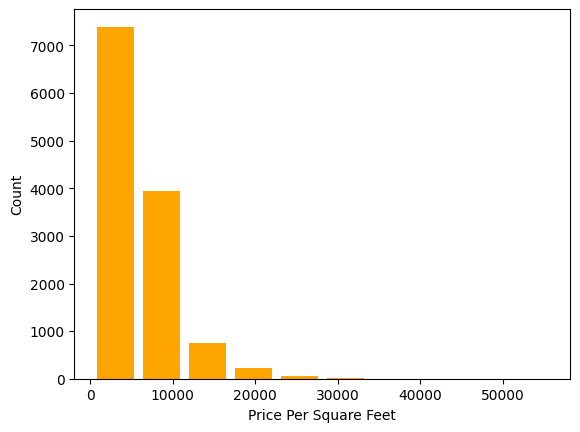

In [102]:
import matplotlib.pyplot as plt
plt.hist(df6.price_per_sqft,rwidth=0.8, color='orange')
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [48]:
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
5,Whitefield,1170.0,2.0,38.00,2,3247.863248


In [50]:
df6.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  9.,  8.,  7.,  6., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [52]:
df6[df6.bath > df6.bhk + 2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1078,other,3300.0,14.0,500.0,9,15151.515152
1953,KR Puram,1200.0,12.0,110.0,8,9166.666667
1979,other,990.0,12.0,120.0,8,12121.212121
2620,other,11338.0,9.0,1000.0,6,8819.897689
6838,Rajaji Nagar,7500.0,8.0,1700.0,5,22666.666667
6937,5th Block Hbr Layout,2600.0,12.0,675.0,9,25961.538462
7709,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
8106,other,1850.0,12.0,300.0,8,16216.216216
9990,other,1200.0,9.0,122.0,6,10166.666667
10695,Electronic City,1200.0,13.0,150.0,9,12500.000000


In [53]:
df6.shape

(12453, 6)

In [57]:
df7 = df6[df6.bath < df6.bhk + 2]
df7.shape

(12296, 6)

In [59]:
df8 = df7.drop(['price_per_sqft'], axis='columns')
df8.head(30)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
10,Whitefield,1800.0,2.0,70.00,3
11,Whitefield,2785.0,5.0,295.00,4


Handling categorical values such as Location

In [60]:
dummies = pd.get_dummies(df8.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [61]:
df9 = pd.concat([df8, dummies.drop('other', axis='columns')], axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Chikka Tirupathi,2600.0,5.0,120.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,1440.0,2.0,62.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Lingadheeranahalli,1521.0,3.0,95.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Whitefield,1170.0,2.0,38.00,2,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [62]:
df10 = df9.drop('location', axis='columns')
df10.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,120.00,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,62.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,95.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1170.0,2.0,38.00,2,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


BUILDING THE MODEL

In [89]:
X = df10.drop(['price'], axis='columns')
y = df10.price

y_log = np.log(y)

In [90]:
X.isnull().sum()

total_sqft             46
bath                    0
bhk                     0
1st Block Jayanagar     0
1st Phase JP Nagar      0
                       ..
Yelachenahalli          0
Yelahanka               0
Yelahanka New Town      0
Yelenahalli             0
Yeshwanthpur            0
Length: 244, dtype: int64

In [91]:
X.fillna(X.mean(), inplace=True)
X.isnull().sum()

total_sqft             0
bath                   0
bhk                    0
1st Block Jayanagar    0
1st Phase JP Nagar     0
                      ..
Yelachenahalli         0
Yelahanka              0
Yelahanka New Town     0
Yelenahalli            0
Yeshwanthpur           0
Length: 244, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=10)

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 150]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train,y_train)

,model,best_score,best_params
0,linear_regression,0.630118,{'fit_intercept': True}
1,lasso,0.339860,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.711636,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,random_forest,0.774644,{'n_estimators': 150}


In [103]:
model = RandomForestRegressor(n_estimators=150, random_state=10)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=10)

Exporting the model to be further used by the flask server

In [104]:
import pickle
with open('bengaluru_home_prices_model.pickle', 'wb') as f:
    pickle.dump(model, f)

Exporting columns of the model trained

In [105]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))